<a href="https://colab.research.google.com/github/nadsmal/nadsmal/blob/main/Wine_Dataset_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min, silhouette_samples
from sklearn.decomposition import PCA

In [64]:
#Read dataset
df =pd.read_csv('winequality_red.csv', encoding='latin-1')

In [65]:
df.shape #Check rows, columns

(1599, 12)

In [66]:
df.head(15) #Show first 15 records

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   

    fre_sulfur_dioxide  totalsulfur_dioxide  density    pH  sulphates  \
0                 11.0                 34.0   0.9978  3.51       0.56   
1                 25.0                 67.0   0.9968  3.20       0.68   
2                 15.0                 54.0   0.9970  3.26       0.65   
3                 17.0                 60.0   0.9980  3.16       0.58   
4                 11.0                 34.0   0.9978  3.51       0.56   
5                 13.0                 40.0   0.9978  3.51       0.56   
6                 15.0                 59.0   0.9964  3.30       0.46   
7                 15.0                 21.0   0.9946  3.39       0.47   
8                  9.0                 18.0   0.9968  3.36       0.57   
9                 17.0                102.0   0.9978  3.35       0.80   
10                15.0                 65.0   0.9959  3.28       0.54   
11                17.0                102.0   0.9978  3.35       0.80   
12                16.0                 59.0   0.9943  3.58       0.52   
13                 9.0                 29.0   0.9974  3.26       1.56   
14                52.0                145.0   0.9986  3.16       0.88   

    alcohol  quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5  
5       9.4        5  
6       9.4        5  
7      10.0        7  
8       9.5        7  
9      10.5        5  
10      9.2        5  
11     10.5        5  
12      9.9        5  
13      9.1        5  
14      9.2        5

In [67]:
#View dataset info
print(df.info())
print(df.describe())  #Descriptive statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed_acidity        1599 non-null   float64
 1   volatile_acidity     1599 non-null   float64
 2   citric_acid          1599 non-null   float64
 3   residual_sugar       1599 non-null   float64
 4   chlorides            1599 non-null   float64
 5   fre_sulfur_dioxide   1599 non-null   float64
 6   totalsulfur_dioxide  1599 non-null   float64
 7   density              1599 non-null   float64
 8   pH                   1599 non-null   float64
 9   sulphates            1599 non-null   float64
 10  alcohol              1599 non-null   float64
 11  quality              1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000

In [68]:
#Check for missing values
print(df.isnull().sum())

fixed_acidity          0
volatile_acidity       0
citric_acid            0
residual_sugar         0
chlorides              0
fre_sulfur_dioxide     0
totalsulfur_dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64


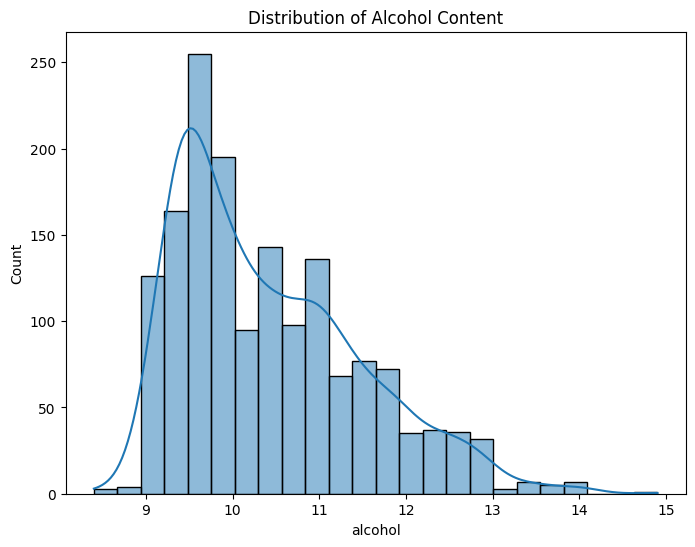

In [69]:
#Histogram of alcohol content
plt.figure(figsize=(8, 6))
sns.histplot(df['alcohol'], kde=True)
plt.title('Distribution of Alcohol Content')
plt.show()

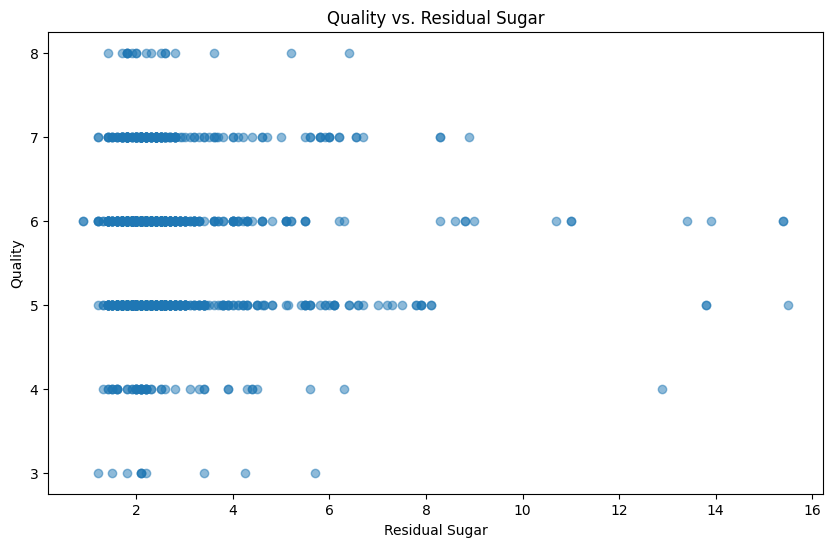

In [70]:
#Scatterplot for quality vs pH
plt.figure(figsize=(10, 6))
plt.scatter(df['residual_sugar'], df['quality'], alpha=0.5)
plt.title('Quality vs. Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


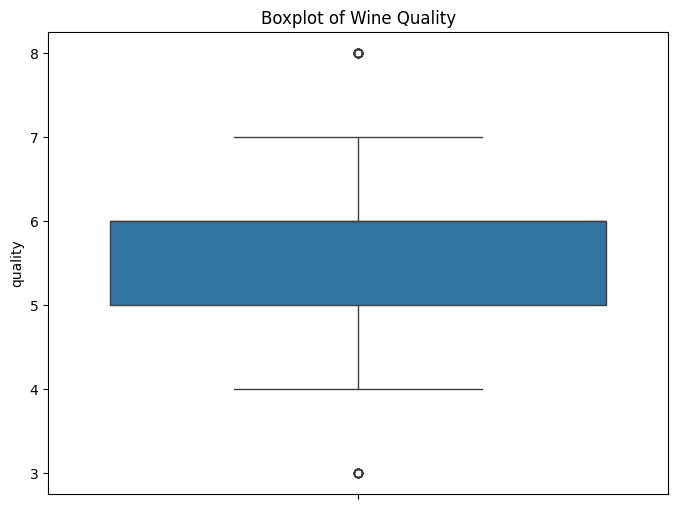

In [40]:
#Boxplot for wine quality
plt.figure(figsize=(8, 6))
sns.boxplot(df['quality'])
plt.title('Boxplot of Wine Quality')
plt.show()

Text(0.5, 1.0, 'Distribution of Wine Quality')

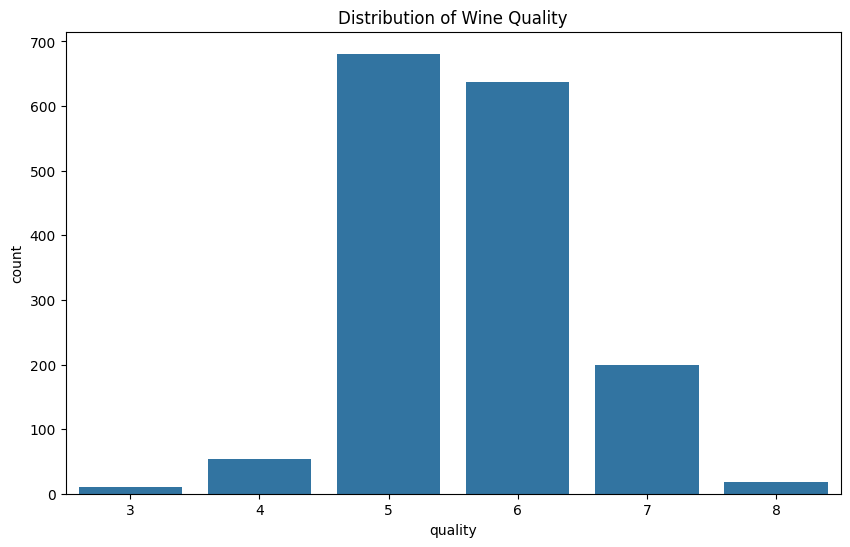

In [41]:
#Counts of quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')

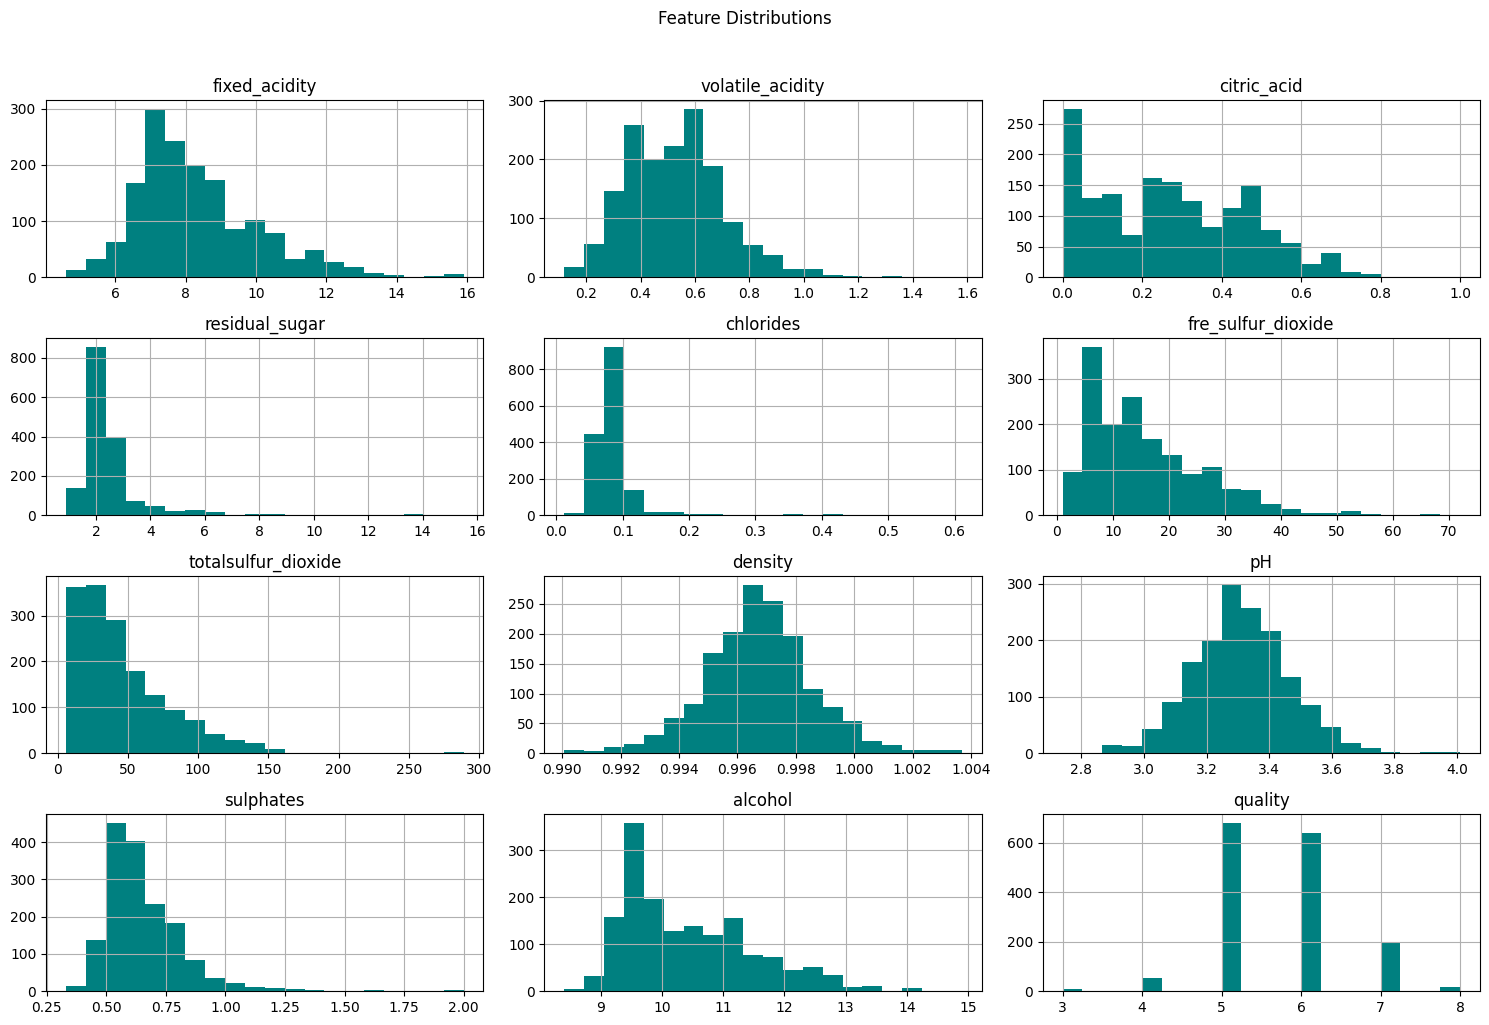

In [42]:
#Histogram of feature distributions
df.hist(figsize=(15, 10), bins=20, color='teal')
plt.suptitle('Feature Distributions', y=1.02)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

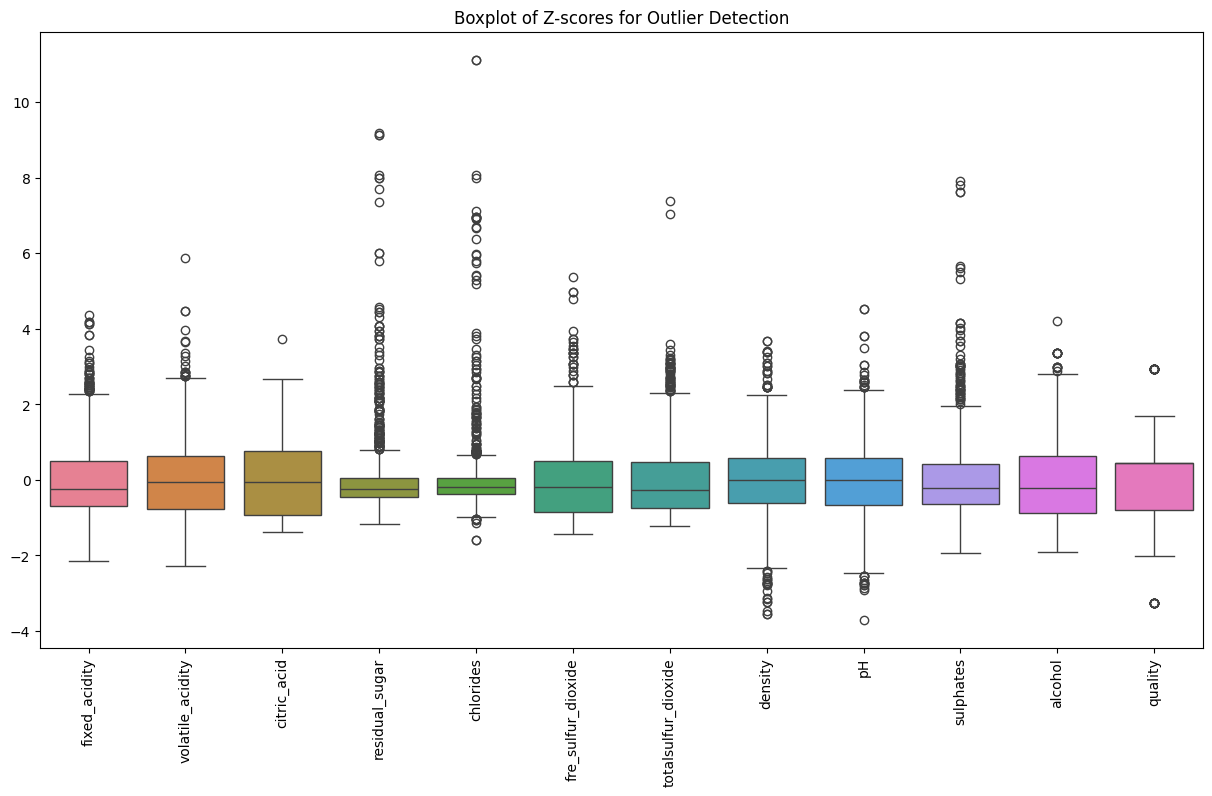

In [43]:
from scipy.stats import zscore
#Calculate z-scores to detect outliers
df_z = df.apply(zscore)

#Boxplot of z-scores
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_z)
plt.title('Boxplot of Z-scores for Outlier Detection')
plt.xticks(rotation=90)
plt.show()

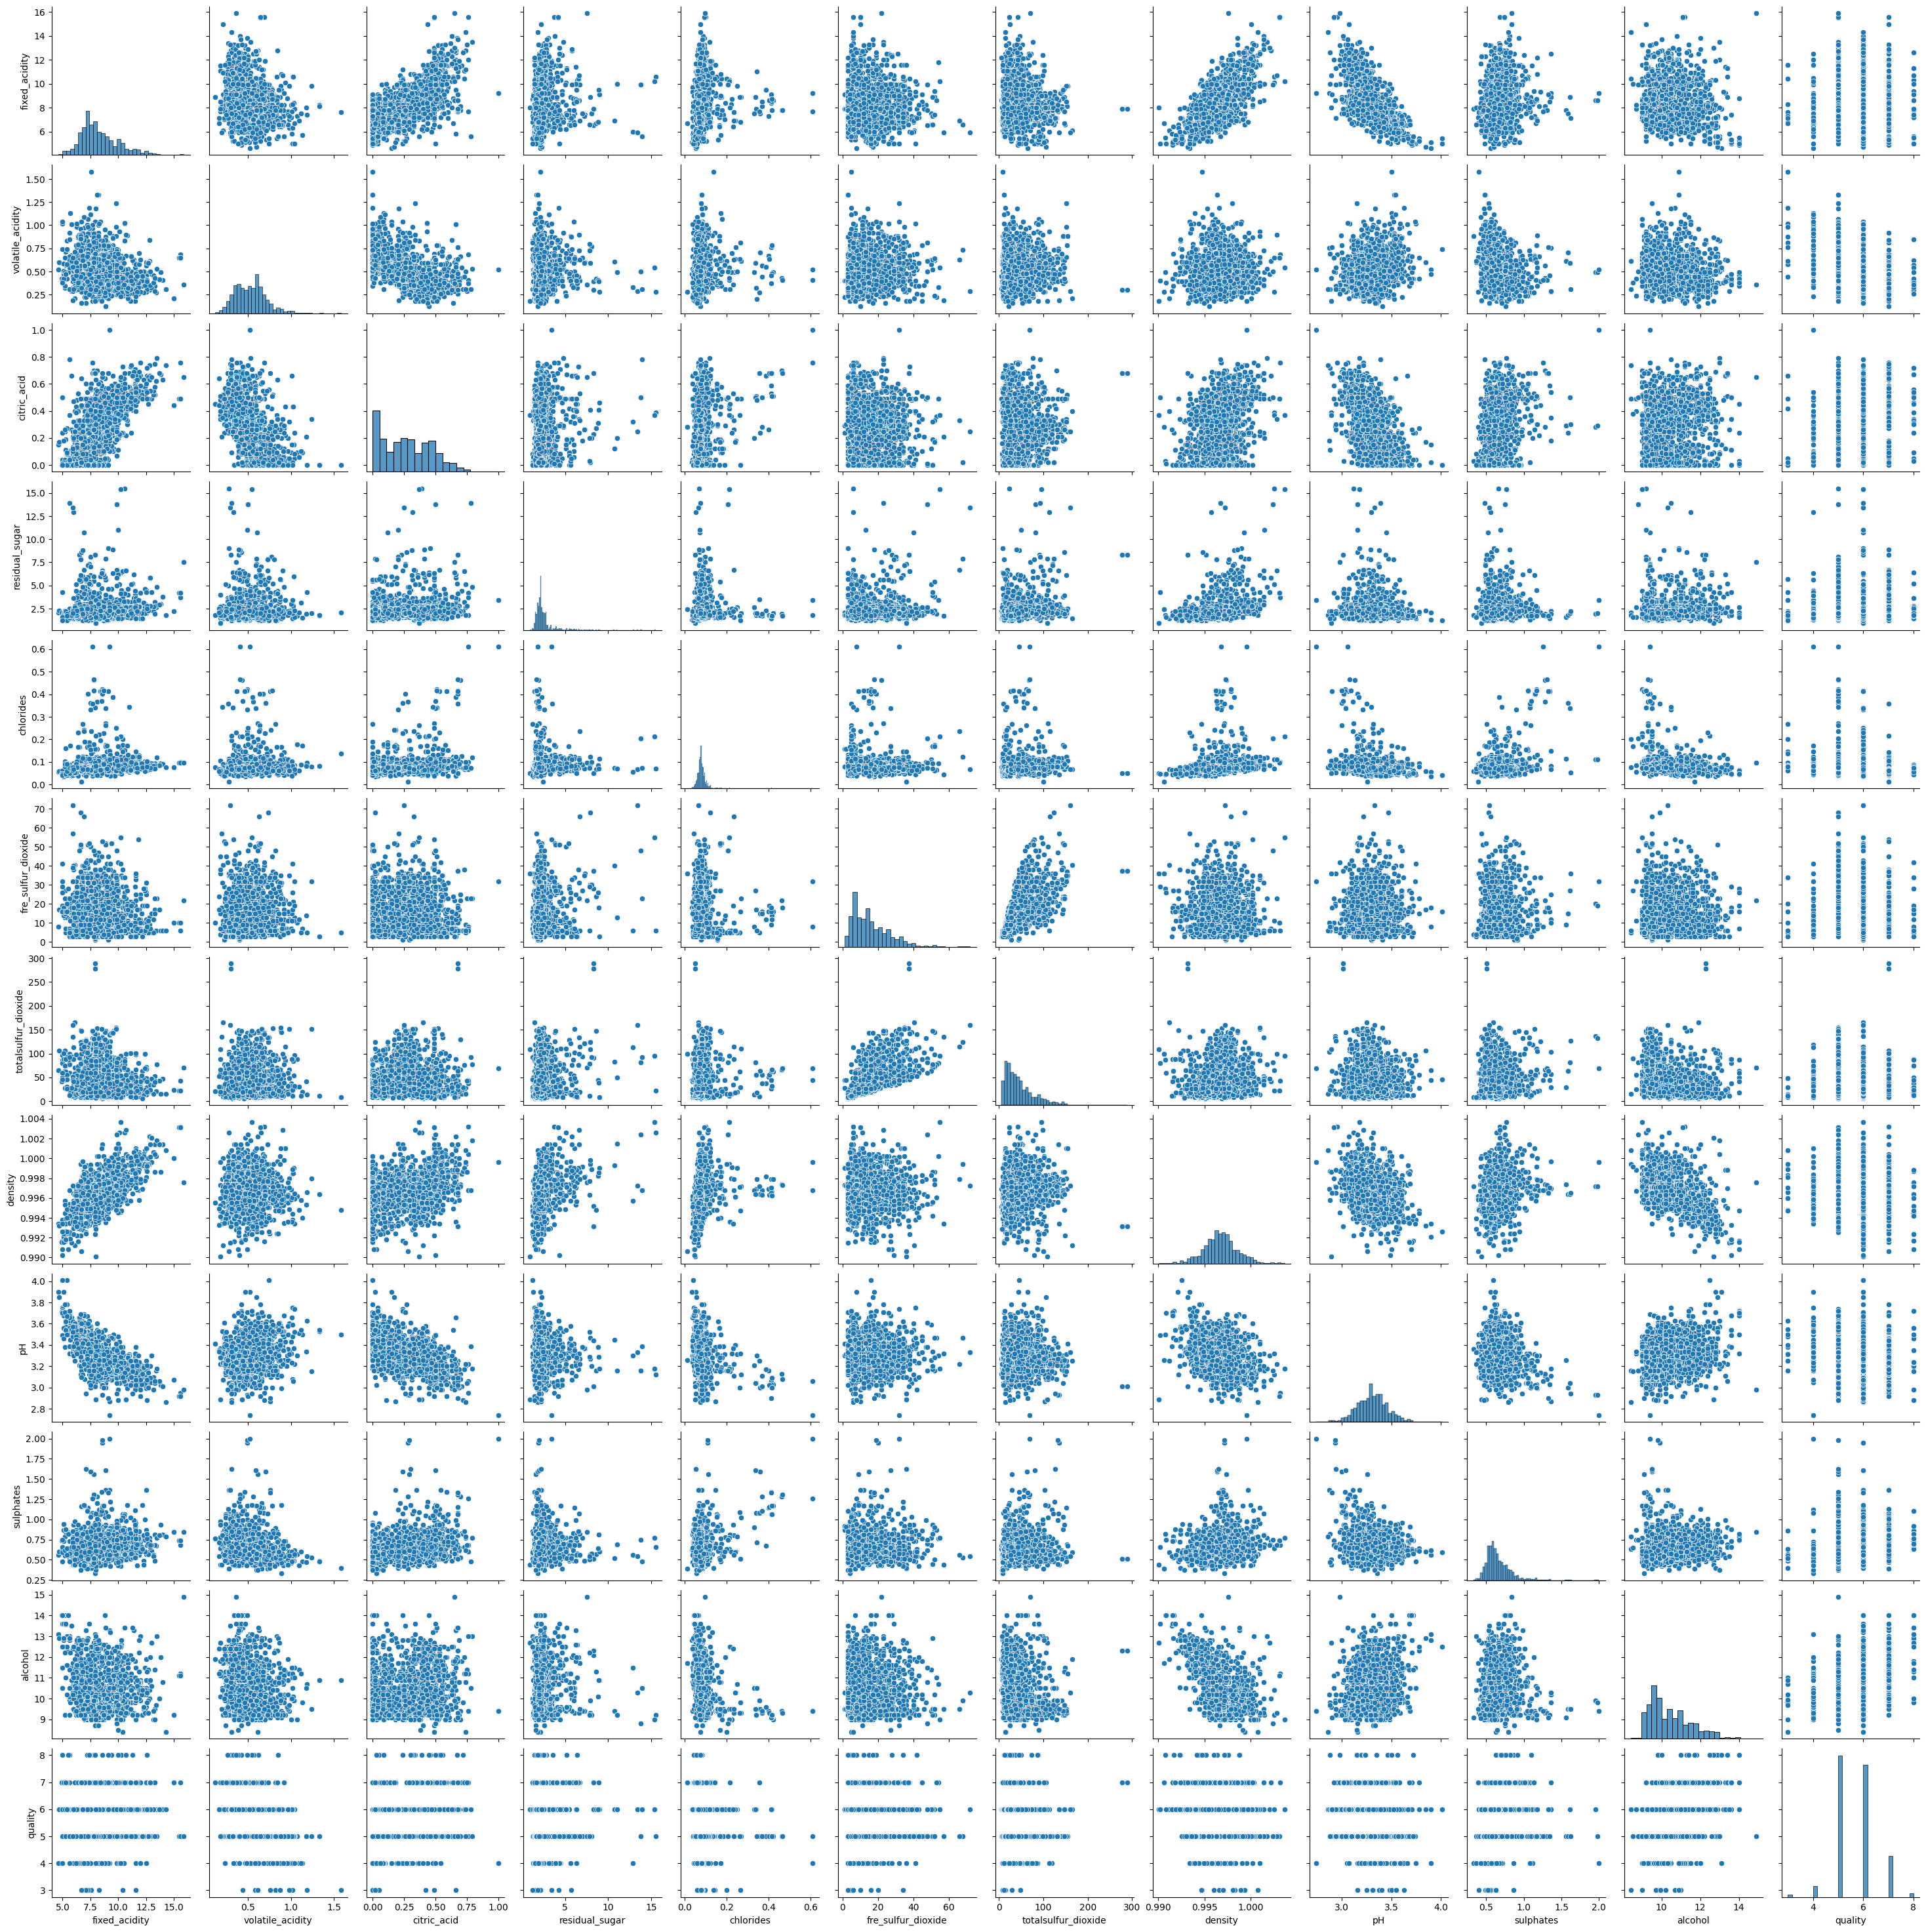

In [44]:
#Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

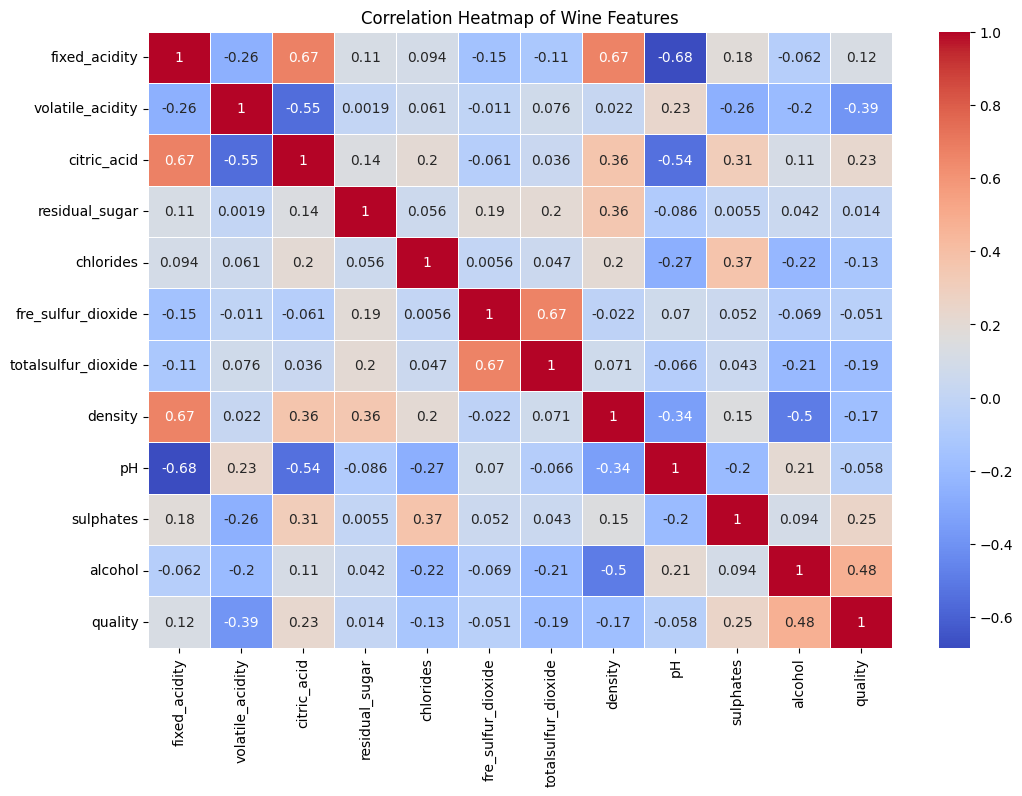

In [45]:
#Heatmap visual
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.show()

In [46]:
df=df.drop('quality', axis=1)
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'fre_sulfur_dioxide', 'totalsulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [47]:
#Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

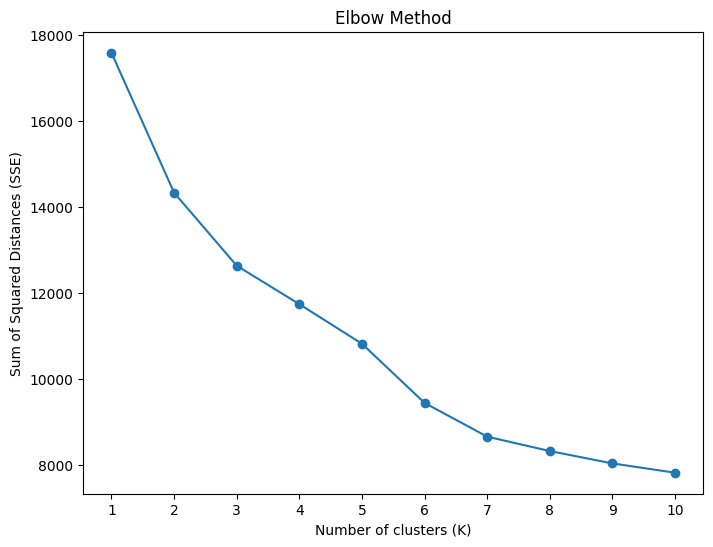

In [48]:
#Elbow Method to find the optimal number of clusters
sse = []
k_range = range(1, 11)  #Test K from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

#Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.xticks(k_range)
plt.show()

In [49]:
#Range of k values to try
k_range = range(2, 11)  #Try k values from 2 - 10

#Calculate silhouette scores
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

Silhouette Score for k=2: 0.21372996335489314
Silhouette Score for k=3: 0.18920406811089496
Silhouette Score for k=4: 0.18518319806210176
Silhouette Score for k=5: 0.16546359497348295
Silhouette Score for k=6: 0.18081259098537378
Silhouette Score for k=7: 0.18907447140493458
Silhouette Score for k=8: 0.18341860513383973
Silhouette Score for k=9: 0.18123198622200568
Silhouette Score for k=10: 0.18526032984423557


In [50]:
#Perform PCA
pca = PCA()
X = pca.fit_transform(df_scaled)

In [51]:
#kmeans for K=3 based on the Elbow Method and Silhouette Score
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans.fit(df_scaled)

#Add cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

#Iteratively Recalculate Centroids and Visualize Clustering
# Initializing random centroids
np.random.seed(42)
initial_centroids_idx = np.random.choice(range(df_scaled.shape[0]), size=K, replace=False)
centroids = df_scaled[initial_centroids_idx]

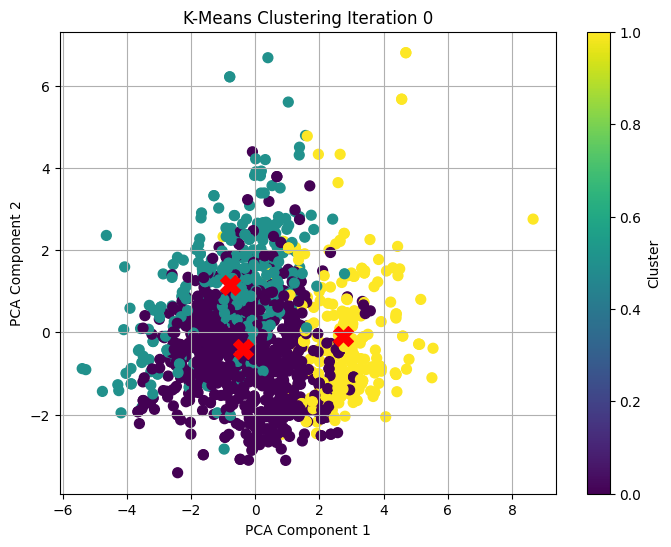

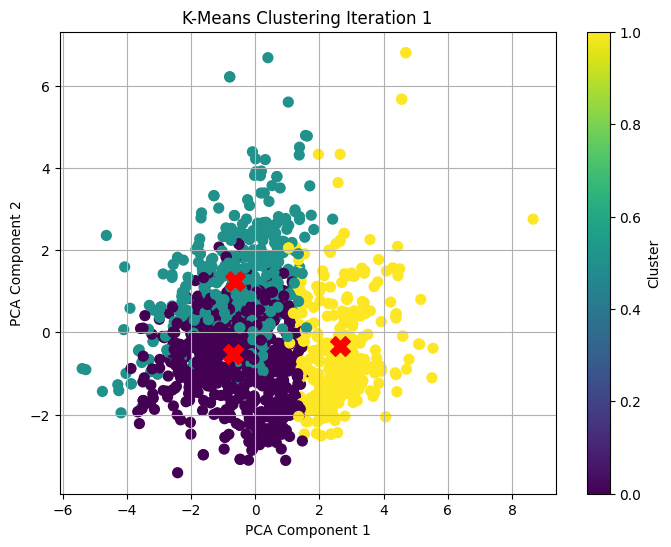

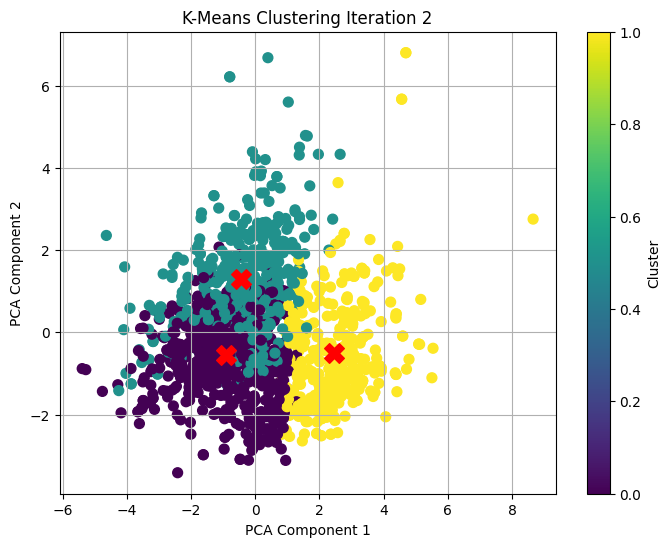

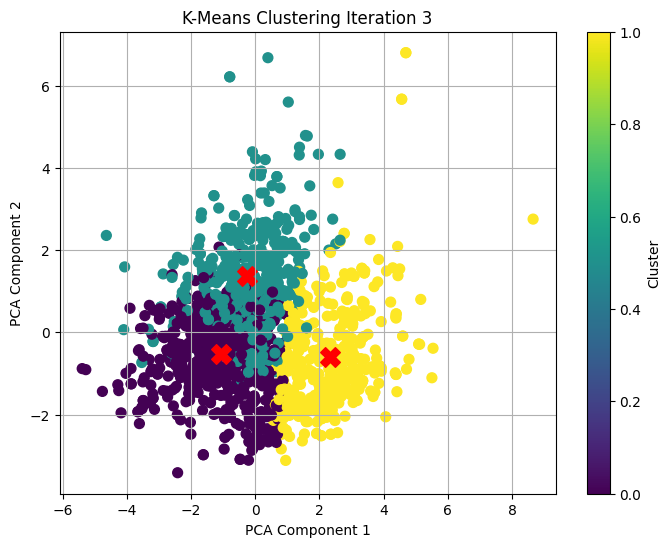

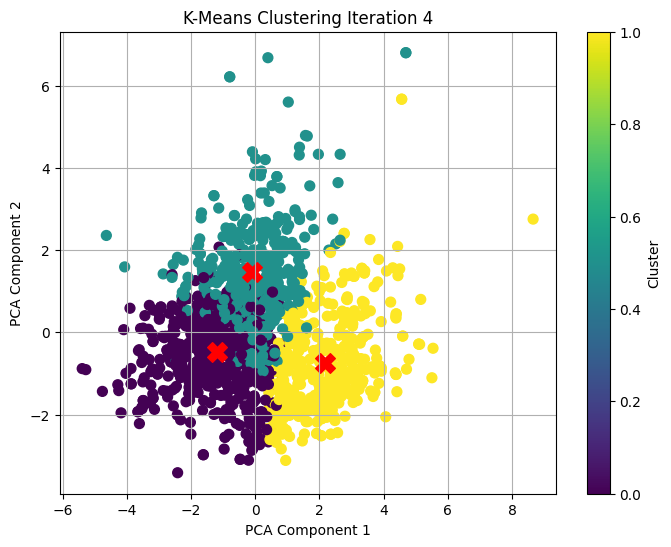

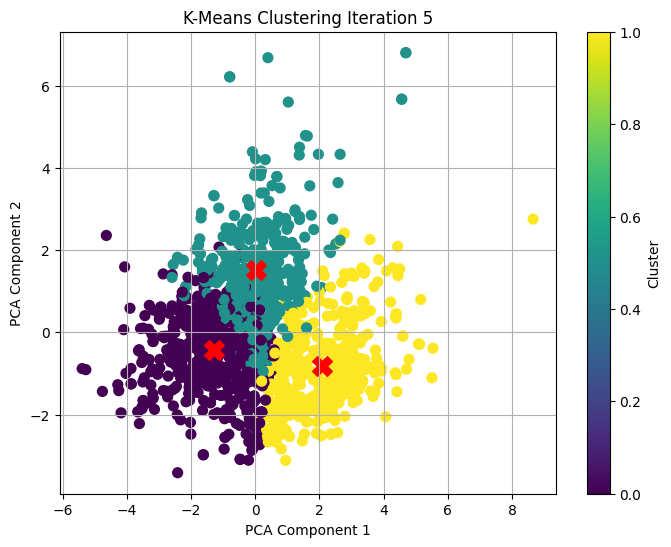

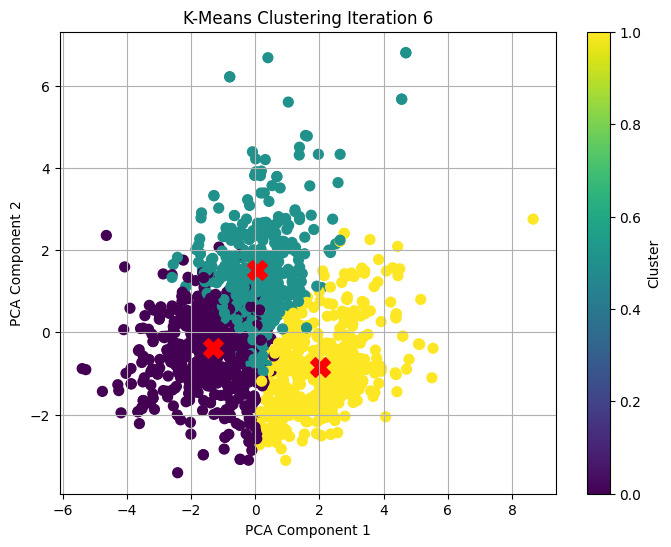

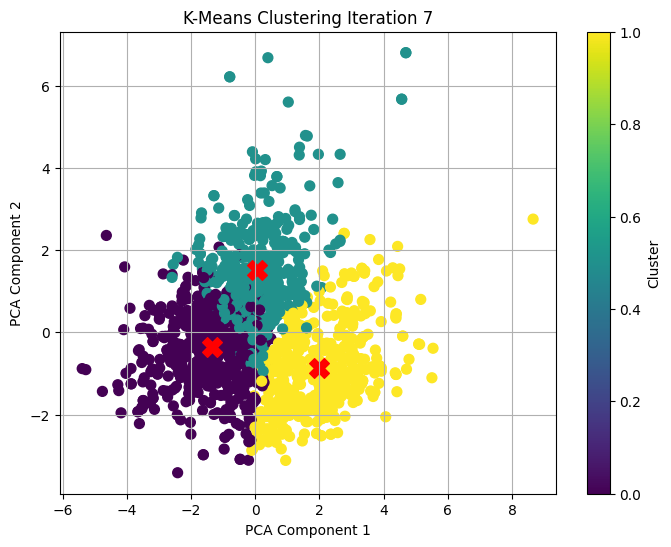

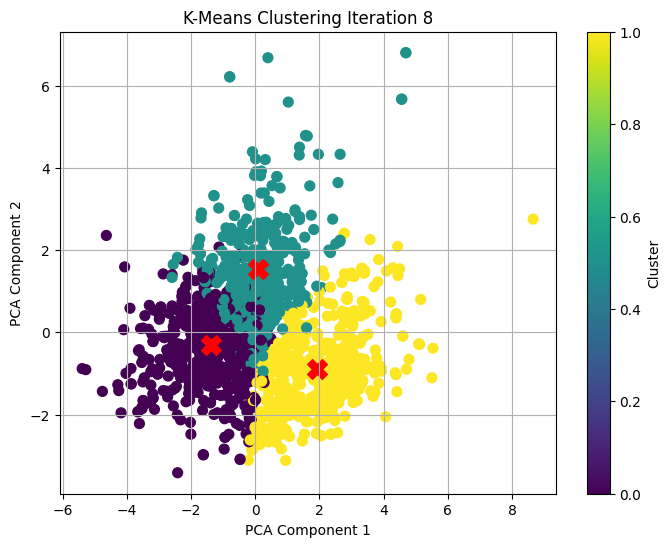

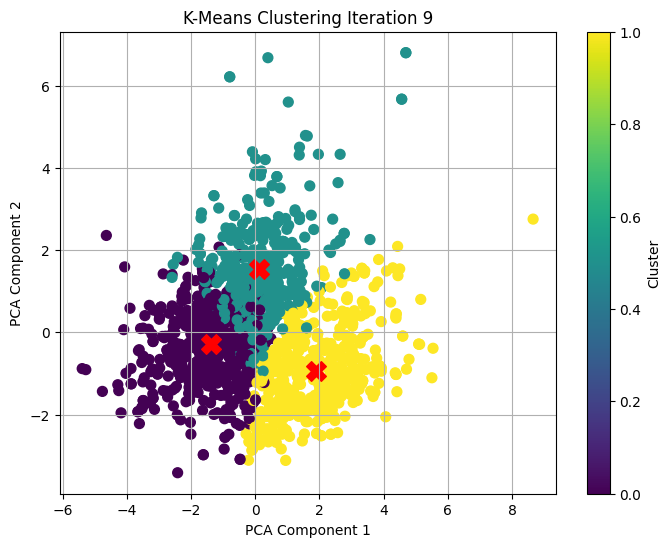

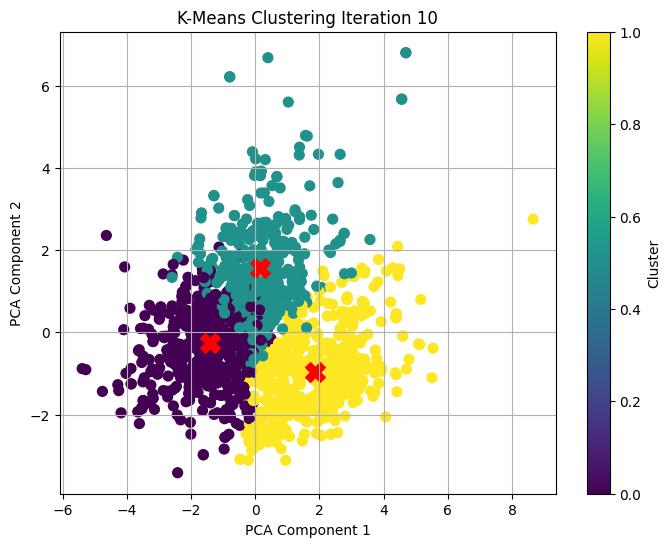

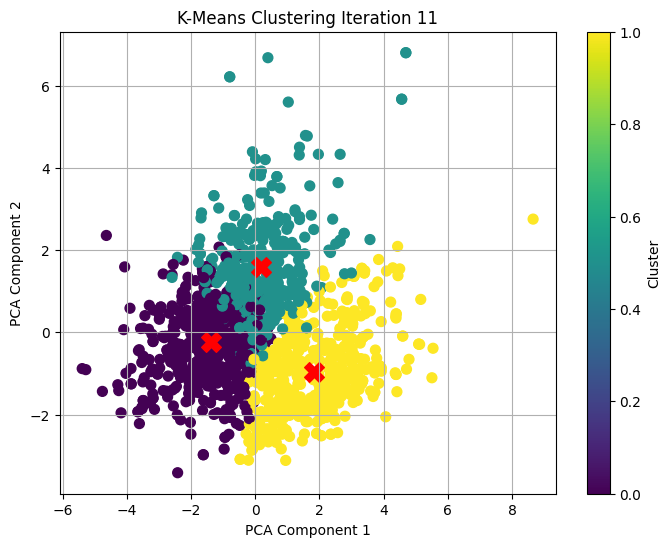

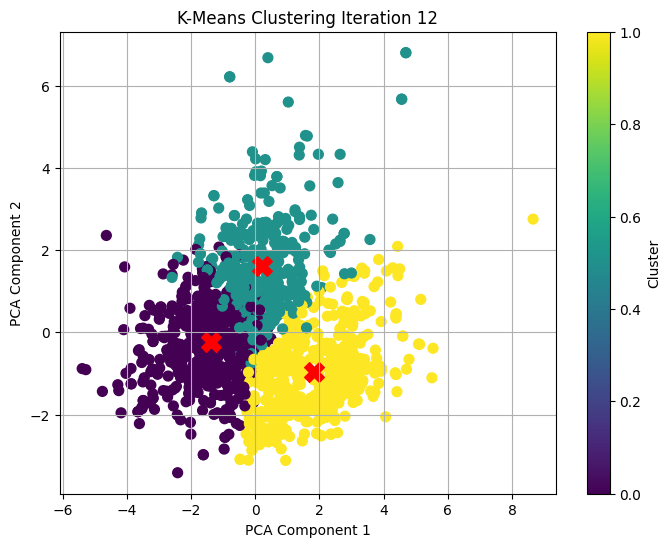

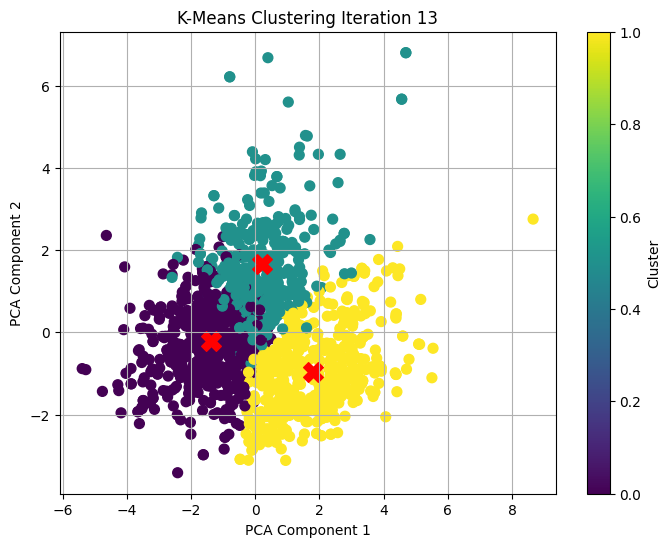

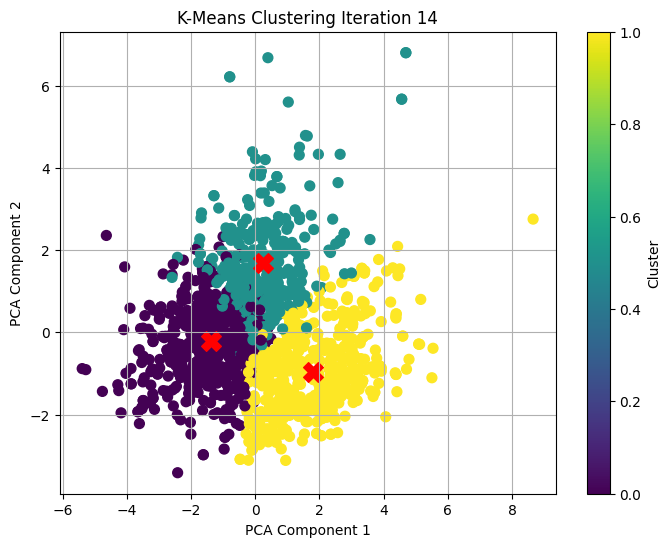

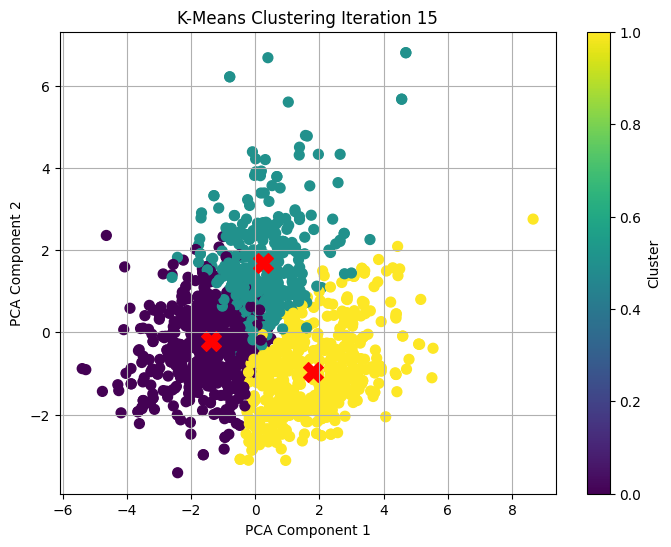

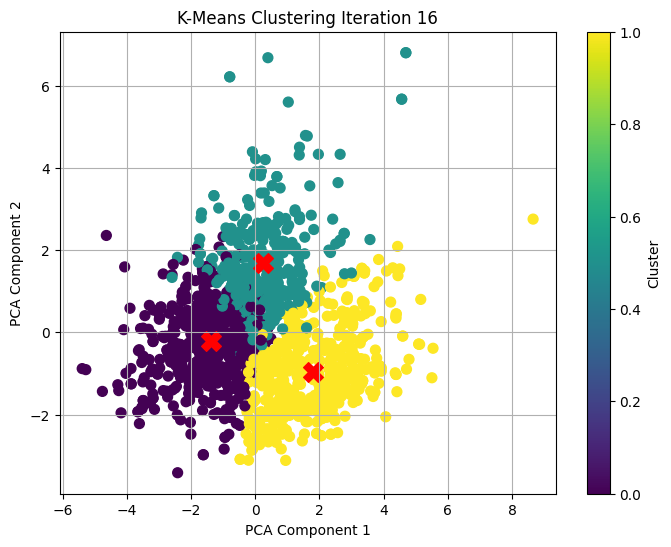

Convergence reached at iteration 16


In [52]:
#Plot clusters and centroids
def plot_clusters(data, centroids, labels, iteration):
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    centroids_pca = pca.transform(centroids)

    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-Means Clustering Iteration {iteration}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

# K-Means iterations with centroid recalculation
max_iterations = 100  # Maximum number of iterations
tolerance = 1e-4  # Stop if centroids change very little

for iteration in range(max_iterations):
    #Assign clusters based on the closest centroid
    distances = np.linalg.norm(df_scaled[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    #Recalculate centroids as mean of points in each cluster
    new_centroids = np.array([df_scaled[labels == i].mean(axis=0) for i in range(K)])

    #Plot the current clusters and centroids
    plot_clusters(df_scaled, new_centroids, labels, iteration)

    #Check if centroids stabilize
    if np.all(np.abs(new_centroids - centroids) < tolerance):
        print(f'Convergence reached at iteration {iteration}')
        break

    centroids = new_centroids

#Final cluster assignments
df['cluster'] = labels

In [53]:
#Anomaly Detection
#Compute distances to centroids
closest, distances = pairwise_distances_argmin_min(df_scaled, centroids)

# Define a threshold for anomaly detection (e.g., top 5% of distances)
threshold = np.percentile(distances, 95)

# Identify anomalies as points with distances greater than threshold
anomalies = df[distances > threshold]

# Display the anomalies
print(f'Number of anomalies: {len(anomalies)}')
print(anomalies.head(10))

Number of anomalies: 80
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
13            7.8             0.610         0.29             1.6      0.114   
17            8.1             0.560         0.28             1.7      0.368   
19            7.9             0.320         0.51             1.8      0.341   
33            6.9             0.605         0.12            10.7      0.073   
42            7.5             0.490         0.20             2.6      0.332   
81            7.8             0.430         0.70             1.9      0.464   
83            7.3             0.670         0.26             1.8      0.401   
86            8.6             0.490         0.28             1.9      0.110   
91            8.6             0.490         0.28             1.9      0.110   
92            8.6             0.490         0.29             2.0      0.110   

    fre_sulfur_dioxide  totalsulfur_dioxide  density    pH  sulphates  \
13                 9.0           